# Introduction to Pairs Trading in Quantopian

In [31]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

# Set the seed for the random number generator
np.random.seed(107)

# Case 1. Generating two Simulated Securities

In the first case we will generate two fake securities following a normal distribution, which in the case of financial assets, is an erroneous assumption, as the returns have fatter tails than normally distributed data.

## 1. Generating the Data

X's daily returns by drawing from a normal distribution and then performing a cumulative sum to get the value of X on each day

**Daily Returns:** normal distribution sample

<p style="text-align:center;"> $X_{\text{return}_i} \sim N(0,1)$</p> for $i=1,2,...,n$

**Daily Prices:** cumulative sum of Daily Returns shifted by a random positive integer 

<p style="text-align:center;">$X = \sum(X_{\text{return}_i}) + \alpha$</p>

### Data for X:

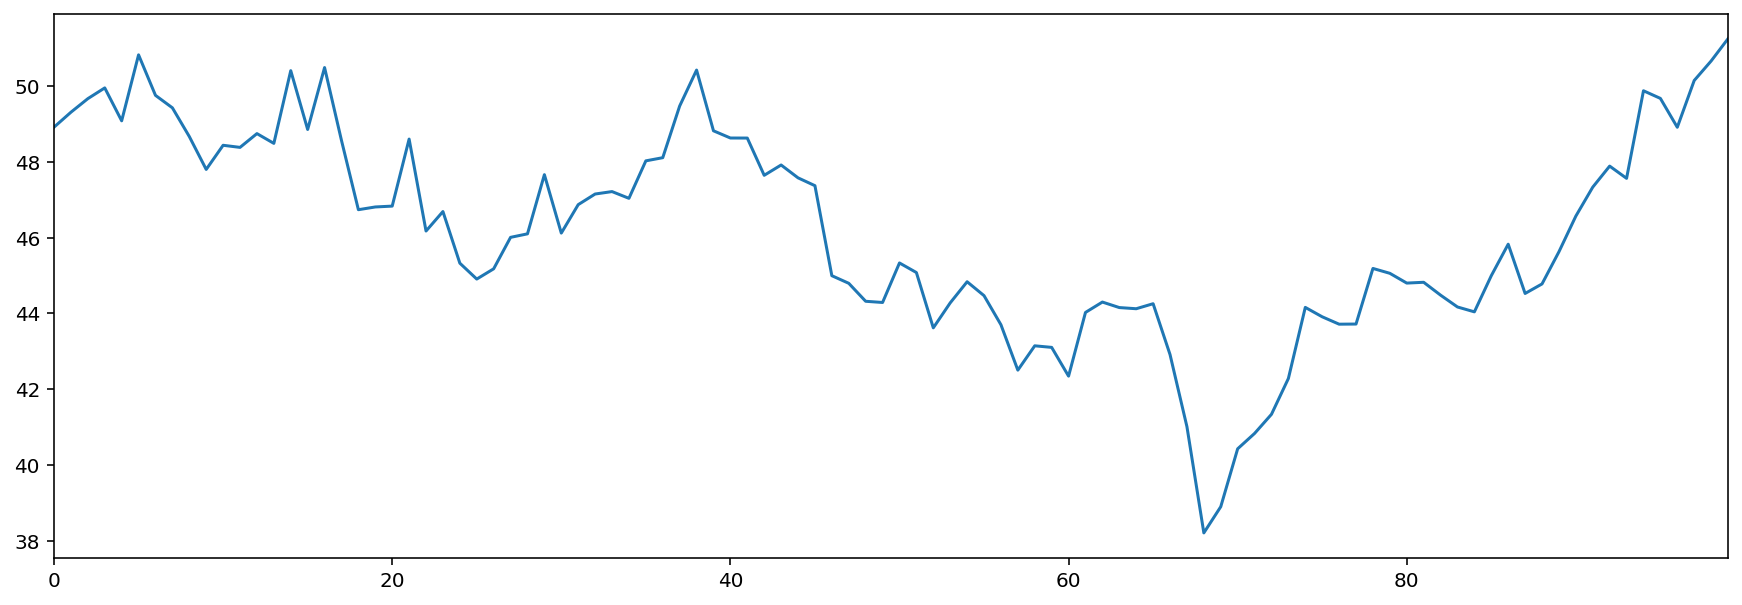

In [17]:
# Generate 100 daily returns
X_returns = np.random.normal(0,1,100)

## Sum them up and shift all the prices up into a reasonable range (by changing the intercept)
X = pd.Series(np.cumsum(X_returns), name = "X") + 50

X.plot()
plt.show()

### Data for Y:

We assume that $Y \text{and} X$ have a deep economical meaning, therefore the price of $Y$ should vary in a similar way that the price of $X$ does.

<p style="text-align:center;">$Y = X + \alpha + e_t$</p>

<p style="text-align:center;">$e_t \sim N(0,1)$</p>

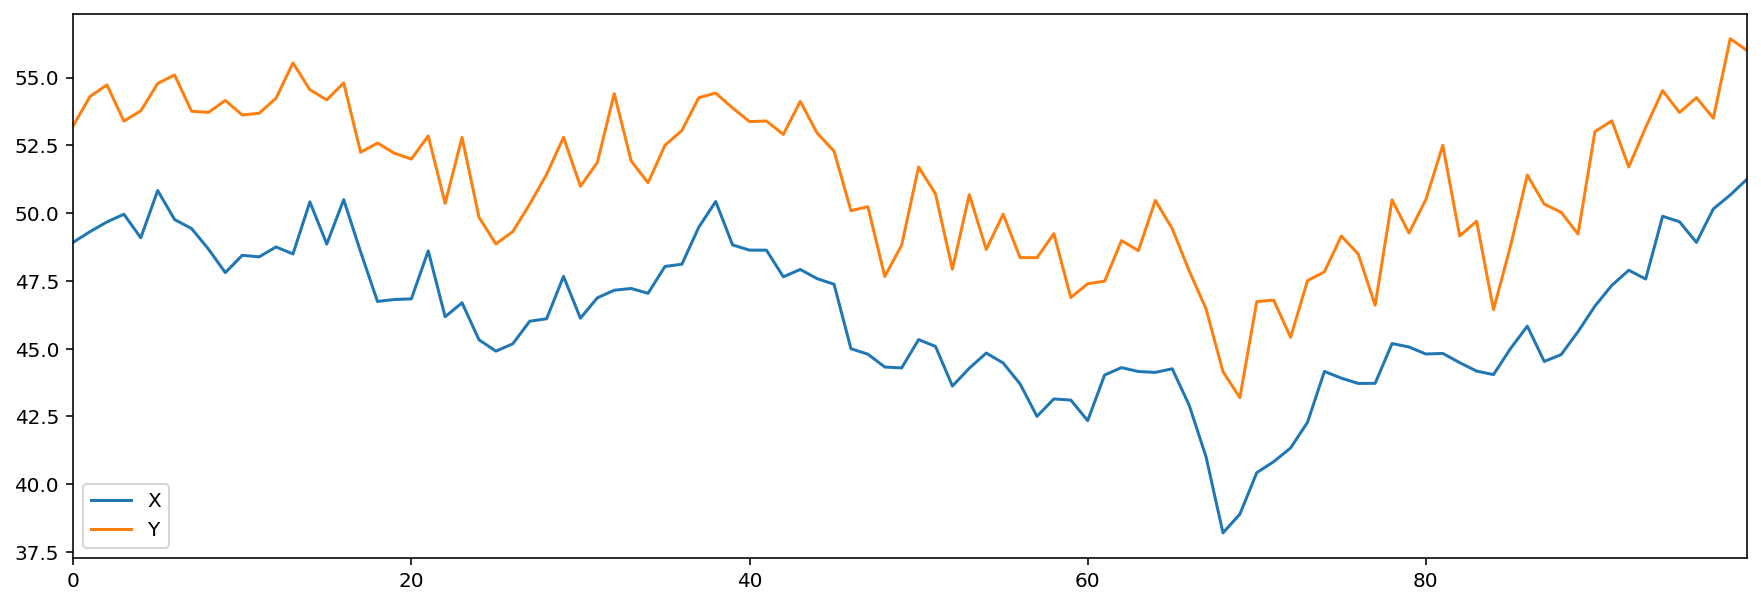

In [24]:
# Generate Y
e_t = np.random.normal(0,1,100)
Y = pd.Series(X + 5 + e_t, name = "Y")

# Concatenate X and Y and plot the resulting chart
pd.concat([X,Y], axis = 1).plot()
plt.show()

As expected, the two series look like they are highly correlated.

## 2. Cointegration

Meaning there is some linear combination between them that will vary around a mean.

- At all points in time, the combination between them is related to the same probability distribution

### The Price Spread 

The price spread of an $I(1)$ process becomes a $I(0)$ process.

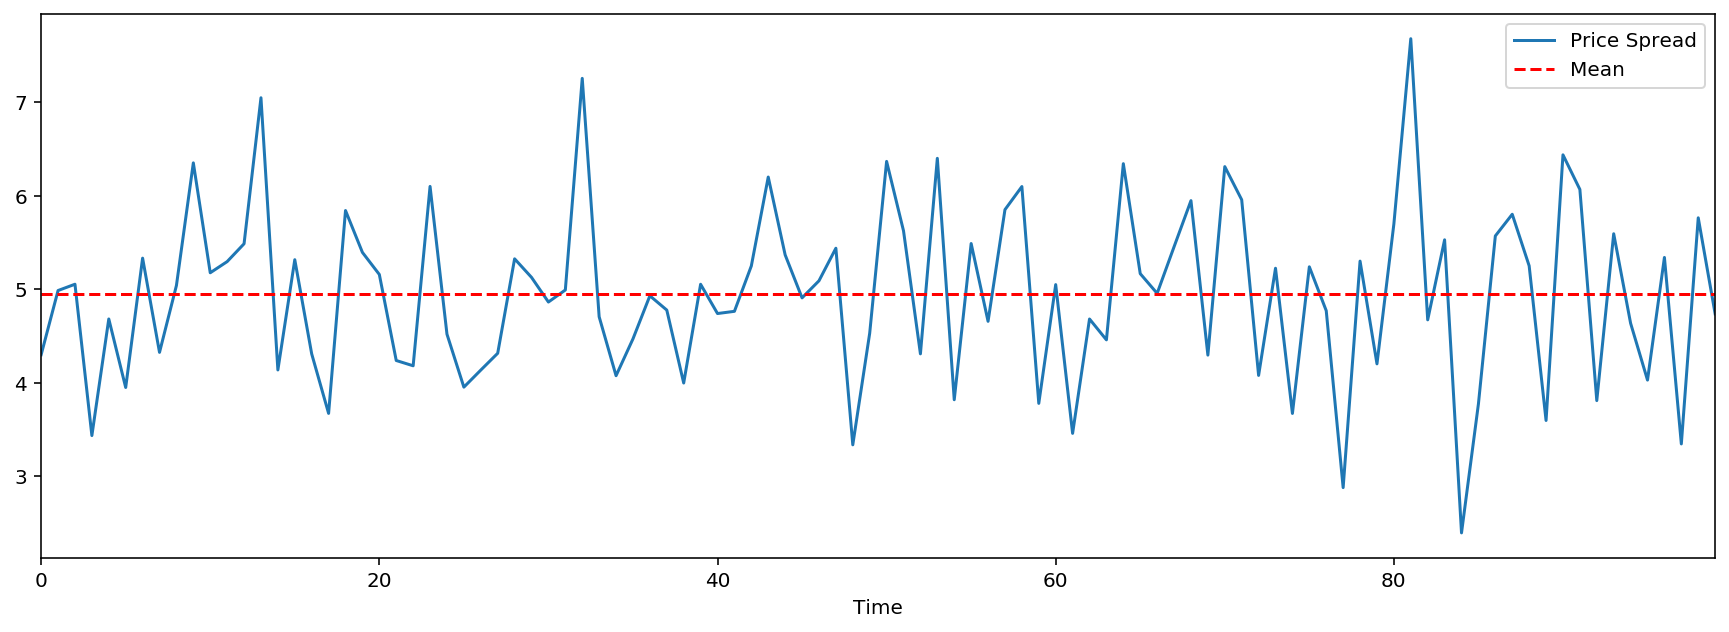

In [29]:
# Plotting the spread
(Y-X).plot()

# Add the mean
plt.axhline((Y-X).mean(), color = "red", linestyle = "--")

# Labels and legend
plt.xlabel("Time")
plt.legend(["Price Spread","Mean"])

plt.show()

## Testing for Cointegration

### Get Residual

### Augmented Dickey Fuller Test

<p style="text-align:center;"> $H_0: \text{Unit Root}$ </p>

In [ ]:
ts.adfuller()